## <ins>Exercise 1: The Collatz conjecture</ins>



For a positive integer $a$, consider the sequence defined by $x_0=a$ and
$$x_{n+1}=\begin{cases}3x_n+1&\text{if $x_n$ is odd,}\\ x_n/2&\text{if $x_n$ is even.}\end{cases}$$
The [Collatz conjecture](http://en.wikipedia.org/wiki/Collatz_conjecture) states that this sequence will *always* reach $1$, no matter what the given value of $a$ is.

#### (1.A.) Write a Python function `f(x)` that computes the function $f:\mathbb Z\to\mathbb Z$ given by 

$$f(x)=\begin{cases}3x+1&\text{if $x$ is odd,}\\ x/2&\text{if $x$ is even.}\end{cases}$$ Test this function by computing $f(n)$ for $1\leq n\leq 20$. (Note that the output should be integer, not floating point!)

In [1]:
def f(num):
    if num%2 == 0:
        return int(num/2)
    else:
        return int(3*num + 1)

for i in range(1,21):
    print(f(i))

4
1
10
2
16
3
22
4
28
5
34
6
40
7
46
8
52
9
58
10


You can also use this function **iteratively** to build a sequence of numbers. You can do that by taking an initial number $x_0$, apply the Collatz function to produce a new number $x_1=f(x_0)$, and then iterate this process by plugging the new number to build $x_2=f(x_1)$, etc. For instance, starting with $x=10$, say, will produce you $10\to5\to16\to8\to4\to2\to1\to4\to2\to1\ldots$.

We now want to explore this sequence, so-called the Collatz sequence, in more detail.

#### (1.B): Write three Python functions:
- `iterate_Collatz_for(a,N)`, 
- `iterate_Collatz_while(a)`, and  
- `recursive_Collatz(a)`  

The first two returns a list of the iterates of the Collatz function ($x_0=a,x_1=f(x_0), x_2=f(x_1),\ldots$) using a `for loop` and a `while loop`, respectively. In the first case, an additional parameter $N$ (the number of iterations of the for loop) needs to be provided, in the second case, the function should stop once the sequence reaches $x=1$. The third function implements a recursive function. In this case, the function  ***prints*** out the values  $x_{n+1}=f(x_n)$, starting with $x_0=a$ and ending with the first occurrence of $x_N=1$ and ***outputs*** (i.e. returns) the number of iterations $N$.



Test all three functions with $a=10$.





In [2]:
def iterate_Collatz_for(a, N):
    result = []
    result.append(a)
    for i in range(1, N+1):
        result.append(f(result[i-1]))
    return result

print(iterate_Collatz_for(10, 6))

def iterate_Collatz_while(a):
    result = []
    result.append(a)
    while(result[-1] != 1):
        result.append(f(result[-1]))
    return result

print(iterate_Collatz_while(10))

def recursive_Collatz(a):
    print(a)
    if a == 1:
        return 0
    else:
        return 1 + recursive_Collatz(f(a))
    
print(recursive_Collatz(10))

[10, 5, 16, 8, 4, 2, 1]
[10, 5, 16, 8, 4, 2, 1]
10
5
16
8
4
2
1
6


#### (1.C) Then, for k ranging between 10 and 30, 
- generate Collatz sequences with length 100 elements, starting at k
- Plot all the resulting together in the same figure. What do you observe? In 1937, Collatz made a conjecture about this sequence. Could you guess what the conjecture was?


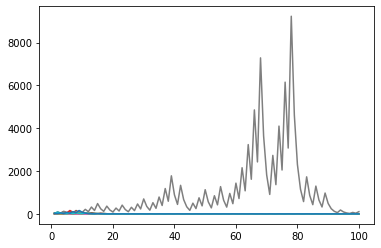

In [4]:
import matplotlib.pyplot as plt

def plot_Collatz(start, end):
    x = list(range(1, 101))
    for i in range(start, end+1):
        y = iterate_Collatz_for(i, 99)
        plt.plot(x, y)
    plt.show()
      
plot_Collatz(10, 30)

### Conjecture : Regardless of the initial positive integer value, the series always reduces to 1 and once reached, oscillates as 4 - 2 - 1- 4 - 2 -1 - etc

## <ins>Exercise 2: Numerical analysis with Python: root finding by implementing Newton-Raphson algorithm</ins>


In the lecture you learned about the bisection method, as a numerical algorithm which you can use to approximate the root of a function. But there are other alternatives, here we introduce a very popular one: the so-called Newton-Raphson algorithm. First, we give a visual example of how the algorithm works.

#### 2.A Look to the image and gif below for a couple of minutes, and try to come up by yourself with an expression that, given an initial point $x_{ini}$, gives a better approximation to the root $x^*$ (which satisfies $f(x^*)=0$). For this part, don't scroll down below the gif !


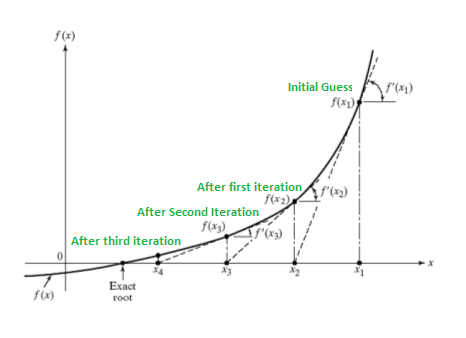

![newtoniteration](https://austingwalters.com/wp-content/uploads/2014/03/NewtonIteration_Ani.gif)

#### 2.B Now, implement a Python function called `my_Newton(f,df,a,N)` which takes a function $f$, its derivative $df$, an initial point $a$, and an integer $N$, and implements the following algorithm: 

1. Start with a point $a$.
2. Let $x_0=a$ the first approximation to the root of $f$.
3. Then, the new approximation to the root is $x_{1}=x_0-\frac{f(x_0)}{f'(x_0)}\;.$
4. Repeat step 3 iteratively a total of $N$ times 
5. Return $x_N$

In [5]:
def my_Newton(f, df, a, N):
    root = a
    for i in range(1, N+1):
        root = root - (f(root)/df(root))
    return root

#### 2.C Using lambda functions, approximate the root of the function $f(x)=x^2-2x-3$. Try two different initial points: -5 and 5, and see what you get. You can choose to write down the derivative as a lambda function, or define a function which approximates the derivative numerically (see previous assignments).

In [6]:
f = lambda x : x**2 - 2*x - 3
df = lambda x : 2*x - 2

print(my_Newton(f, df, -5, 5))
print(my_Newton(f, df, 5, 5))

-1.0000000009313226
3.000000000000002


#### 2.D There exists a Python function that already implements this algorithm. Try to find it online, import the necessary module, and check that you get the same results as before. Finally, plot $f(x)=x^2-2x-3$ for $x\in [-6,6]$

In [7]:
from scipy.optimize import newton

print(newton(f, -5))
print(newton(f, 5))

-1.0000000000000002
3.0000000000000004


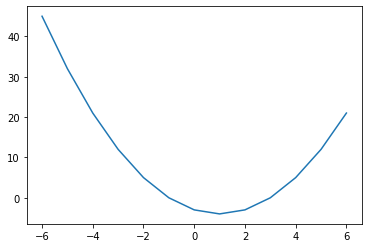

In [8]:
def plot_f(start, end):
    x = list(range(start, end+1))
    y = [f(i) for i in x]
    plt.plot(x, y)
    plt.show()
    
plot_f(-6, 6)

In [36]:
def my_f(input):
    maximum = float('-inf')
    sum_of_elements = 0
    sum_of_elements_except_largest = 0
    for item in input:
        if item > maximum:
            maximum = item
        sum_of_elements += item
    sum_of_elements_except_largest = sum_of_elements - maximum
    if sum_of_elements_except_largest > 0:
        return 1
    elif sum_of_elements > 0:
        return 2
    else:
        return 3
    
print(my_f([-11,4,10]))

2


In [8]:
def my_bool(bool1, bool2):
    return bool(bool1) != bool(bool2)

print(my_bool(1<2,5>1))

False


In [17]:
def my_andor(x, y, z):
    if not isinstance(z, int):
        return 0
    if z>0:
        return x and y
    elif z<0:
        return x or y
    else:
        return not(x or y)
    
print(my_andor(1>3,2<3,1.5))
print(my_andor(1>3,2<3,-2))


0
True


In [18]:
def lists_to_dic(list1, list2):
    if len(list1) != len(list2):
        return 0
    else:
        result = {}
        for i in range(0, len(list1)):
            result[list1[i]] = list2[i]
        return result

print(lists_to_dic([1,2,3],['red','black','blue']))
print(lists_to_dic([1,2,3,4],['red','black','blue']))


{1: 'red', 2: 'black', 3: 'blue'}
0


In [19]:
def symbolic_trajectory(string):
    mapping = {'A':-2, 'B':2}
    Z = []
    for character in string:
        Z.append(mapping.get(character))
    return sum(Z)
        
print(symbolic_trajectory('ABAABAABABBAAAABABABAABA'))


-12


In [25]:
def my_sort(int1, int2, int3):
    integer_list = []
    integer_list.append(int1)
    integer_list.append(int2)
    integer_list.append(int3)
    for i in range(len(integer_list)):
        index_of_minimum = i
        for j in range(i+1, len(integer_list)):
            if integer_list[index_of_minimum] > integer_list[j]:
                index_of_minimum = j
        integer_list[i], integer_list[index_of_minimum] = integer_list[index_of_minimum], integer_list[i]
    return integer_list

print(my_sort(4,3,2))


[2, 3, 4]


In [29]:
def mypart(z):
    if z<0:
        return 0
    result = []
    for i in range(1, z):
        result.append([i, z-i])
    return result

print(mypart(9))


[[1, 8], [2, 7], [3, 6], [4, 5], [5, 4], [6, 3], [7, 2], [8, 1]]


In [34]:
def my_PL(n):
    if n == 0:
        return 1
    elif n == 1:
        return 2
    else:
        return my_PL(n-1) + 2*my_PL(n-2)
    
print(my_PL(35))


34359738368
